In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation # do the animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # display the animation in notebook
import sys

# Game of Life 

In [2]:
# values for cell on or off in the grid
alive = 1 # values for cell alive
dead = 0 # value for cell dead
vals = [alive, dead]

# GoF Patterns

### - Still lifes patterns  (patterns woh stay the same in function of the time)

In [3]:
# block
block = np.array([[ alive, alive], [alive, alive]])

#beehive
beehive = np.array([ [ 0, alive, alive, 0],[alive, 0, 0, alive], [ 0, alive, alive, 0,]])


### - Oscillators patterns


In [4]:
# the more simple oscillator 
simple_oscill = np.array([[0, 0, 0],[alive, alive, alive],  [0, 0, 0]])



### - Spaceships patterns (patterns who moves in the grid)

In [5]:
#The "glider" - period of 5 
glider = np.array([[0, 0, alive], [alive, 0, alive], [0, alive, alive]])


## Function for adding the initial pattern to the grid

In [6]:
# grid : the grid where we want to put the pattern
# pattern : the pattern of alive and death cells we want at the begining
# localisation : the loclisation of the top left celle of the pattern in the grid

# output: the grid with the pattern

def addpaterntogrid(grid,pattern, localisation = 'middle'):
    # dimension of the pattern
    c = np.size(pattern,axis=0)
    l = np.size(pattern,axis=1)
    
    if (localisation == 'top left') :
        grid[1:1+c, 1:1+l] = pattern # add the pattern in the top left corner
    else :
        N = np.size(grid,axis=0) # number of columns (= number of lines)
        grid[N/2:N/2+c, N/2:N/2+l] = pattern # add the pattern in the middle
        
    return grid

### Update grid function

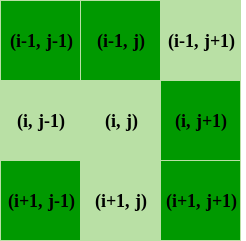

In [7]:
def update_grid(frameNum, img, grid, N):
    
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    # update the image
    img.set_data(grid_tmp)
    grid[:] = grid_tmp[:] # change the old grid
    
    return img, 

### Grid animation 

In [8]:
def show_GoF(grid, N):
    # show the grid 
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='Greys') 
    animation_grid = FuncAnimation(fig, update_grid, fargs=(img, grid, N, ), frames=200, interval=200, save_count=50) # animation  # init_func=create_grid
    plt.close()
    
    return animation_grid

### Grid generation

In [13]:
# I will use a predefined number, then it could be chosen by the user as input.
# Grid = matrix NxN in a two dimensional space
# the random pattern is the default one if not explicitly declared, the same for the size

random = np.random.choice(vals, (50-1)*(50-1), p=[0.2, 0.8]).reshape(50-1, 50-1)

def create_grid(N=50, pattern=random, localisation = 'top left'):
    grid = np.zeros((N, N))
    grid = addpaterntogrid(grid, pattern, localisation)
        
    # we could create classes for each pattern and return the grid 
        
    return grid

# GoF implementation

## Small dimension

In [14]:
# here we can generate the grid with dimension and pattern parameters
# show the grid and the animation
N = 50
grid = create_grid(N, glider)
#print(grid)

In [15]:
# show the GoF grid animation
animation = show_GoF(grid, grid.shape[0])
# in anaconda prompt you have to do : conda install -c conda-forge ffmpeg 
HTML(animation.to_html5_video()) # must use it in notebook in order to visualize the animation

In [16]:
# show the GoF grid animation
animation = show_GoF(create_grid(), grid.shape[0])
# in anaconda prompt you have to do : conda install -c conda-forge ffmpeg 
HTML(animation.to_html5_video()) # must use it in notebook in order to visualize the animation

## High dimension with complex pattern

In [12]:
N = 500

## Still lifes pattern analysis

## Oscillators pattern analysis

## Spaceships pattern analysis